In [1]:
%matplotlib inline
from IPython.display import display

from linearmodel.datamanager import DataManager

X_dm = DataManager.read_tab_delimited_data(r'example data\SLR\X.txt')
y_dm = DataManager.read_tab_delimited_data(r'example data\SLR\y.txt')

display(X_dm.get_data().head())
display(y_dm.get_data().head())

,X
DateTime,
2013-02-07 13:00:00,81.5325
2013-02-10 12:00:00,83.1117
2013-02-13 10:30:00,83.9123
2013-02-16 10:15:00,85.2397
2013-02-19 12:00:00,85.4468


,y
DateTime,
2013-02-07 13:00:00,82.474598
2013-02-10 12:00:00,79.335959
2013-02-13 10:30:00,121.990718
2013-02-16 10:15:00,124.153139
2013-02-19 12:00:00,50.207838


In [2]:
dm = y_dm.match_data(X_dm, time_window_width=15, match_method='nearest')
dm.get_data()

,X,y
DateTime,,
2013-02-07 13:00:00,81.5325,82.474598
2013-02-10 12:00:00,83.1117,79.335959
2013-02-13 10:30:00,83.9123,121.990718
2013-02-16 10:15:00,85.2397,124.153139
2013-02-19 12:00:00,85.4468,50.207838
2013-02-23 13:00:00,85.5983,79.907404
2013-03-05 13:00:00,86.0620,118.550990
2013-03-08 16:00:00,86.0626,198.305252
2013-03-10 10:00:00,86.1274,114.465615


C:\Users\domanski\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


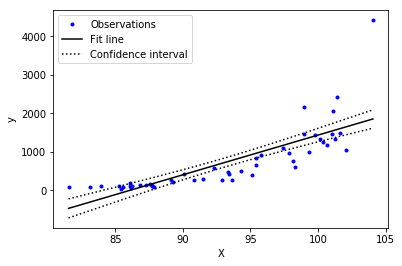

In [3]:
from linearmodel.model import SimpleOLSModel
import matplotlib.pyplot as plt

slo_model = SimpleOLSModel(dm, response_variable='y', explanatory_variable='X')
slo_model.plot()
plt.show()

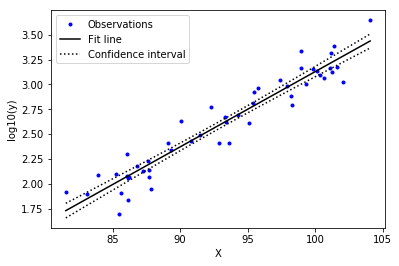

In [4]:
response_variable = slo_model.get_variable_transform_name('y', 'log10')
slo_model.set_response_variable(response_variable)
slo_model.plot()
plt.show()

In [5]:
slo_model.get_model_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
=============================
   Linear regression model:  
-----------------------------
log10(y) = -4.445 + 0.075737X
==========================================================================
                 coef    std err          t      P>|t|  [90.0% Conf. Int.]
--------------------------------------------------------------------------
Intercept     -4.4450      0.311    -14.309   6.15e-19    -4.966    -3.924
X              0.0757      0.003     22.749   2.34e-27     0.070     0.081
                                        OLSRegression Results                                        
=====================================================================================================
Number of observations                         50   R-squared                                 0.91512
Error degrees of freedom                       48   Adjusted R-squared                        0.91335
Root mean squared error                   0.14666   F-statistic vs. constant model             517.51
Residual PPCC                             0.99533   p-value                                2.3378e-27
Linear correlation coefficient            0.95662   RMSE(%)                                    34.756
===============================================
             High leverage:               0.12 
Extreme outlier (Standardized residual):   3   
       High influence (Cook's D)         2.1923
        High influence (DFFITS)           0.4  
-----------------------------------------------
"""

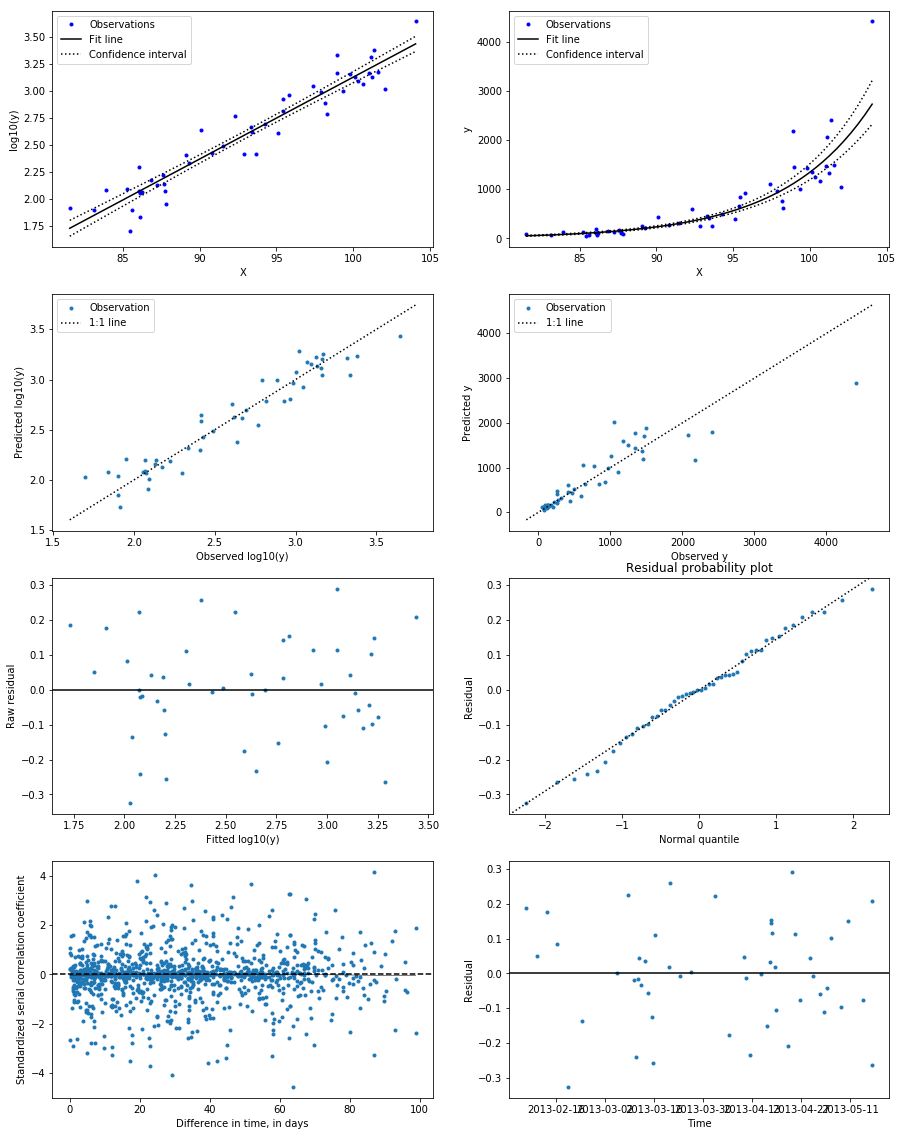

In [6]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)
slo_model.plot(ax=ax1)
slo_model.plot('variable_scatter', ax=ax2)
slo_model.plot('model_pred_vs_obs', ax=ax3)
slo_model.plot('pred_vs_obs', ax=ax4)
slo_model.plot('resid_vs_fitted', ax=ax5)
slo_model.plot('resid_probability', ax=ax6)
slo_model.plot('serial_correlation', ax=ax7)
slo_model.plot('resid_vs_time', ax=ax8)
fig.set_size_inches(15, 20)